In [42]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder


df = pd.read_csv('iris.data', delimiter=',')
X = df.iloc[:, 0:4]
y = df.iloc[:, 4]

Label = LabelEncoder()
y = Label.fit_transform(y)
print(df.shape)

(149, 5)


In [43]:
X = X.T

def softmax(V):
    e_V = np.exp(V - np.max(V, axis = 0, keepdims = True))
    Z = e_V / e_V.sum(axis = 0)
    return Z

# cost or loss function
def cost(Y, Yhat):
    return -np.sum(Y*np.log(Yhat))/Y.shape[1]

## One-hot coding
from scipy import sparse
def convert_labels(y, C = 3):
    Y = sparse.coo_matrix((np.ones_like(y),
    (y, np.arange(len(y)))), shape = (C, len(y))).toarray()
    return Y

d0 = 4
d1 = h = 100 # size of hidden layer

d2 = C = 3
# initialize parameters randomly
W1 = 0.01*np.random.randn(d0, d1)
b1 = np.zeros((d1, 1))
W2 = 0.01*np.random.randn(d1, d2)
b2 = np.zeros((d2, 1))

Y = convert_labels(y, C)
N = X.shape[1]
eta = 1 # learning rate
for i in range(10000):
    ## Feedforward
    Z1 = np.dot(W1.T, X) + b1
    A1 = np.maximum(Z1, 0)
    Z2 = np.dot(W2.T, A1) + b2
    Yhat = softmax(Z2)

    # print loss after each 1000 iterations
    if i %1000 == 0:
        # compute the loss: average cross-entropy loss
        loss = cost(Y, Yhat)
        print("iter %d, loss: %f" %(i, loss))

    # backpropagation
    E2 = (Yhat - Y )/N
    dW2 = np.dot(A1, E2.T)
    db2 = np.sum(E2, axis = 1, keepdims = True)
    E1 = np.dot(W2, E2)
    E1[Z1 <= 0] = 0 # gradient of ReLU
    dW1 = np.dot(X, E1.T)
    db1 = np.sum(E1, axis = 1, keepdims = True)
    # Gradient Descent update
    W1 += -eta*dW1
    b1 += -eta*db1
    W2 += -eta*dW2
    b2 += -eta*db2
    
Z1 = np.dot(W1.T, X) + b1
A1 = np.maximum(Z1, 0)
Z2 = np.dot(W2.T, A1) + b2
predicted_class = np.argmax(Z2, axis=0)
acc = 100*np.mean(predicted_class == y)
print('training accuracy: %.2f %%' % (acc))

iter 0, loss: 1.099097
iter 1000, loss: 1.098567
iter 2000, loss: 1.098567
iter 3000, loss: 1.098567
iter 4000, loss: 1.098567
iter 5000, loss: 1.098567
iter 6000, loss: 1.098567
iter 7000, loss: 1.098567
iter 8000, loss: 1.098567
iter 9000, loss: 1.098567
training accuracy: 33.56 %


(4, 149)
(149,)
Accuracy: 0.9555555555555556


/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


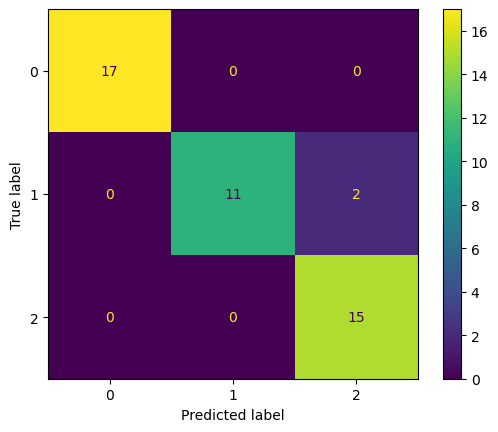

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, confusion_matrix
from sklearn.neural_network import MLPClassifier

#train test split
X_train, X_test, y_train, y_test = train_test_split(X.T, y, test_size=0.3, random_state=25)
print(X.shape)
print(y.shape)
#Creat model
ANN = MLPClassifier()
ANN.fit(X_train, y_train)

#predict
y_pred = ANN.predict(X_test)

#accuracy score
print("Accuracy:", accuracy_score(y_test, y_pred))

#Confusion Matrix
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred)).plot()
